# Building a Movie Recommendation System For ShowMax Films Using MovieLens Dataset

- Welcome to the ShowMax Movies Recommender System notebook. In this project, I will leverage MovieLens Dataset obtained from the GroupLens Research Lab https://grouplens.org/datasets/movielens/ located at University of Minnesota to build two distinct recommendation engines:

    - Collaborative Filtering Recommender: Employs user interaction data (like movie ratings) to identify patterns and recommend movies based on user preferences.
    - Content-Based Recommender: Utilizes movie metadata such as genres, overviews, and other textual features to find similar movies.


- Additionally, I will further perform a comparative analysis of both systems to understand their strengths and weaknesses. This notebook is structured into seven main sections:

   1. Business Understanding
        - Overview of the Project
        - Problem statement
        - Objectives of the project
        - Business challenge and proposed solution
   2. Data Understanding
   3. Data Preparation- Setting up, Importing Libraries and Utility Functions and Loading
   4. Data Cleaning
   5. Data Exploration
   6. Building a Recommendation System Model:
        - Collaborative Filtering Recommender
        - Content-Based Recommender
   7. Comparison Analysis
   8. Recommendations and Conclusion


##  Business Understanding

#### 1.1. Overview of the Project

- The Movie streaming industry is highly competitive, with companies such as Hollywood, Ghallywood, Nollywood, Prime Video, Riverwood, White Rhino Films, Amazon and Netflix continually seeking ways to enhance user experience. One of the key strategies for success in the movies market is the use of personalized recommendation systems. Platforms like GroupLens research Lab at the University of Minnesota have demonstrated how data-driven insights from user preferences and viewing behaviours can appreciably improve user engagements by suggesting relevant moview and shows to the users. By use of tailored personalized recommendations, companies aim to increase user retention, drive higher engagement, and grow subscriptions, ultimately boosting long-term customer partronage and loyalty

#### 1.2. Problem Statement
-  Showmax is a subscription-based video-on-demand streaming service that launched in South Africa on August 19, 2015. It offers a diverse library of content, including series, movies, documentaries, and Showmax Originals, catering to a wide range of viewer preferences.Showmax is primarily owned by MultiChoice Group, holding a 70% stake, with the remaining 30% owned by NBCUniversal. In 2023, Showmax announced a partnership with Comcast's NBCUniversal and Sky, leading to a relaunch in February 2024 with a new app and an expanded content lineup. 

- With the increasing competition in the streaming industry and the exponential growth of video-on-demand platforms across Africa, Showmax is looking to enhance user engagement and retention by offering a personalized movie recommendation system. Showmax currently caters to a diverse audience across 44 African countries with a wide range of local and international content, including series, movies, and documentaries. However, as the content library continues to grow, users often face challenges in discovering relevant content tailored to their unique preferences, resulting in a suboptimal user experience.

- The current recommendation process primarily relies on basic content categories and manual curation, which may not effectively capture evolving user interests or behaviors. This limitation leads to lower content discovery rates, reduced viewing time, and potential user churn. Showmax aims to address these issues by developing an advanced recommendation engine that leverages user interaction data, content metadata, and machine learning algorithms to predict and suggest movies that users are most likely to watch and enjoy.

-  Showmax Films faces the challenge of keeping users engaged on the platform for longer periods. Many users may experience decision fatigue when faced with an overwhelming number of movie options. This can lead to dissatisfaction and even subscription cancallations. Showmax Films needs advanced recommender system to provide personalized, relevant movie suggestions based on users' past ratings and preferences, thus enhancing the overall user experience and reducing defection.

#### 1.3. Objectives of the Project

1. To improve content discovery by providing highly personalized movie recommendations to help users easily find content that aligns with their tastes.
2. To increase average watch time and overall user engagement by offering relevant suggestions based on individual viewing history, ratings, and genre preferences.
3. To help retain users by keeping them continuously engaged with relevant content.
4. To utilize a variety of data inputs, including viewing history, user ratings, genre preferences, and content popularity, to make dynamic and context-aware recommendations.



#### 1.4. Business Challenge and Proposed Solution
- Showmax is facing the following challenges
   1. Handling a large and diverse user base across multiple regions and languages.
   2. Balancing recommendations between local content, international content, and Showmax Originals.
   3. Addressing cold-start problems for new users with little to no viewing history.
   4. Ensuring scalability as the platform expands its content library and user base.

- By developing this recommendation system, Showmax seeks to differentiate itself in the competitive streaming market by delivering a more personalized, engaging, and seamless content consumption experience for its diverse audience.
- A recommender system built using the MovieLens dataset can analyze user rating data to identify patterns and preferences. This system will employ collaborative filtering, content-based filtering, or a hybrid approach to predict movies that users are likely to enjoy. By leveraging machine learning techniques, the model can learn from both explicit (e.g., ratings) and implicit (e.g., viewing history) feedback. Key benefits of this solution include:
     - Personalized Movie Suggestions: Users receive a tailored list of movies that match their unique tastes.
     - Improved Discoverability: Hidden gems and lesser-known titles are surfaced to users, enhancing content exploration.
    - Real-Time Adaptation: The model continuously improves as more user interaction data becomes available, refining recommendations over time.

#### 1.5. Conclusion

- A robust movie recommender system, informed by datasets like MovieLens, is crucial for streaming platforms like ShowMax Films to maintain a competitive edge. By enhancing personalization, increasing engagement, and improving user retention, Netflix can achieve sustainable growth in subscriptions and long-term customer loyalty. Through ongoing optimization, such systems will continue to play a pivotal role in shaping the future of digital entertainment.


## 2.0 Data Understanding

- The MovieLens dataset used in building this movie recommender system was sourced from GroupLens Research Lab at the University of Minnesota being data collected over various period of time.

- The MovieLens Zipped Dataset has Small: 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018.

- The MovieLens dataset has to csv files of interest i.e "Movies.csv" and "ratings.csv"

     - Movies.csv file:
          - Contains 9742 rows and 3 columns
          - Columns include: movieId, title and genres

      - Ratings.csv file:
            - Contains 100836 rows and 4 columns 
            - Coumns include: UserId, movieId, rating and timestamp

## 3.0 Data Preparation

##### In this section, we explore the data by understanding aspects of the data - including, loading the data, identifying the shape, features and data types, and understanding the summary statistics.

#### 3.1 Loading Libraries

In [155]:
pip install scikit-learn xgboost lightgbm catboost

Note: you may need to restart the kernel to use updated packages.


In [156]:
## Data Exploration Libraries
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import nltk
import xgboost as Xb
import re
import time

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)


# Preprocessing and Metric Evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


from tqdm import tqdm


from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score


nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from types import FunctionType
from datetime import datetime

from sklearn.metrics.pairwise import linear_kernel

from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELITEBOOK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ELITEBOOK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELITEBOOK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 3.2 Loading the dataset

In [157]:
# Load and reading the data set

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')


In [158]:
# Checking the First 5 lines for each dataset

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [159]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [160]:
# Explore the column names

column_list = movies.columns.tolist()
print("Movie Dataset Column names as a list:", column_list)
column_list = ratings.columns.tolist()
print("rating dataset Column names as a list:", column_list)

Movie Dataset Column names as a list: ['movieId', 'title', 'genres']
rating dataset Column names as a list: ['userId', 'movieId', 'rating', 'timestamp']


In [161]:
# Explore datatypes
movies.shape

(9742, 3)

In [162]:
# Explore the data types and data features
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [163]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


## 4.0 Data Cleaning

##### We explore if the data needs any cleaning according to the Data Preparation section we have explored above.


## 4.1. Checking for the Missing Values

In [164]:
# Check for empty rows
print(f"Empty rows in movies: {movies.isnull().sum().sum()}")
print(f"Empty rows in ratings: {ratings.isnull().sum().sum()}")


Empty rows in movies: 0
Empty rows in ratings: 0


## 4.2. Checking for duplicated Values and dropping the duplicates


In [165]:
# Check for duplicates
print(f"Duplicates in ratings: {ratings.duplicated(subset='movieId').sum()}")
print(f"Duplicates in movies: {movies.duplicated(subset='movieId').sum()}")

Duplicates in ratings: 91112
Duplicates in movies: 0


In [166]:
# Drop the duplicates items in the ratings dataset
ratings_cleaned = ratings.drop_duplicates(subset=['movieId'])


In [167]:
# Checking the shape of the dataset (Number of rows and columns)
ratings_cleaned.shape

(9724, 4)

In [168]:
# Saving the cleaned ratings dataframe to a new CSV file

cleaned_file_path = "ratings_cleaned.csv"
ratings_cleaned.to_csv(cleaned_file_path, index=False)


In [169]:
print(ratings_cleaned.columns)
print(movies.columns)


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')


## 4.3  Merge Datasets

We merge the `ratings_cleaned` with `movies` to include movie titles in the ratings dataset.

In [170]:
# We merge the `movies` with `ratings` to include movie titles in the ratings dataset:-
merged_df = pd.merge(ratings_cleaned, movies, on='movieId')

In [171]:
merged_df.shape

(9724, 6)

In [172]:
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [173]:
# Dropping the 'timestamp' column
merged_df = merged_df.drop(columns=['timestamp'])

In [174]:
merged_df.shape

(9724, 5)

In [175]:
merged_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [176]:
# Explore the statistical summary of the data for movies, ratings and tags data set
merged_df.describe()

,userId,movieId,rating
count,9724.000000,9724.000000,9724.000000
mean,214.491670,42245.024373,3.298026
std,199.585586,52191.137320,1.103966
min,1.000000,1.000000,0.500000
25%,33.000000,3245.500000,2.500000
50%,135.000000,7300.000000,3.500000
75%,387.000000,76739.250000,4.000000
max,610.000000,193609.000000,5.000000


In [177]:
merged_df.isnull().sum() # Checking missing values in merged_df dataset


userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [178]:
merged_df.duplicated().sum() # Checking for the duplicates in merged_df dataset

0

In [179]:
# Saving the cleaned merged dataframe to a new CSV file

cleaned_file_path = "merged_df.csv"
merged_df.to_csv(cleaned_file_path, index=False)

### 4.4 Droping the column not needed "Timestamp"

In [180]:
# Load and read the merged_df 
merged_df = pd.read_csv('merged_df.csv')
merged_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# 5.0 Data Exploration


## 5.1 Preprocessing

- Here I will load the dataset, check the datatypes, checking for missing values, perform Encoding and feature scaling

In [181]:
# Load the data set
merged_data = pd.read_csv("merged_df.csv")

In [182]:
# Checking the data structure and first few rows of the data
print(merged_data.info())
print(merged_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   9724 non-null   int64  
 1   movieId  9724 non-null   int64  
 2   rating   9724 non-null   float64
 3   title    9724 non-null   object 
 4   genres   9724 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 380.0+ KB
None
   userId  movieId  rating                        title  \
0       1        1     4.0             Toy Story (1995)   
1       1        3     4.0      Grumpier Old Men (1995)   
2       1        6     4.0                  Heat (1995)   
3       1       47     5.0  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3       

In [183]:
# Checking for missing values
print(merged_data.isnull().sum())


userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64


In [184]:
# Indentify numeric and categorical columns
# Numeric columns
numeric_columns = merged_data.select_dtypes(include=['number']).columns.tolist()

# Categorical columns
categorical_columns = merged_data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['userId', 'movieId', 'rating']
Categorical Columns: ['title', 'genres']


In [185]:
#Defining the categorical and numeric columns
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns

categorical_cols = merged_data.select_dtypes(include=['object', 'category']).columns.tolist()


In [186]:
# Perform data Label Encoding 
label_encoder = LabelEncoder()
for col in categorical_cols:
    merged_data[col] = label_encoder.fit_transform(merged_data[col])


In [187]:
# Initialize the scaler and fit on numeric columns
scaler = StandardScaler()
merged_data[numeric_cols] = scaler.fit_transform(merged_data[numeric_cols])


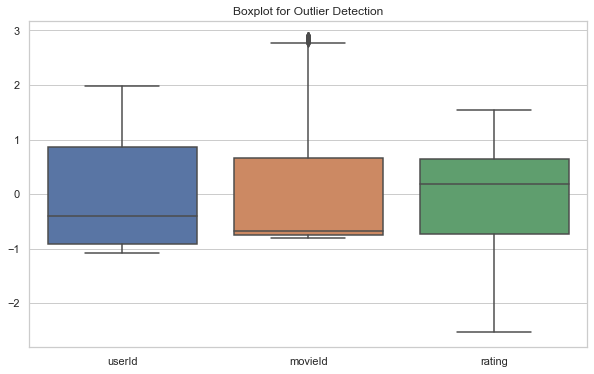

In [188]:
# Checking for outliers for numeric features using boxplots Visualize
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Outlier Detection')
plt.show()


## Explaination of the Boxplot Visualization
- - Suppose the boxplot for the rating column has many outliers beyond the upper whisker.
- - This indicates that there are several high ratings (potential anomalies) compared to the general distribution of ratings.


## 5.2 Building a Preprocessing Pipeline



In [189]:
from sklearn.compose import ColumnTransformer

In [190]:
# Loading the dataset
merged_data = pd.read_csv("merged_df.csv")


In [191]:
# Define features (X) and target (y) (modify 'rating' to your target column)
X = merged_data.drop(['rating'], axis=1)
y = merged_data['rating']


In [192]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [193]:
# Preprocessing for numeric data: Handle missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())                 # Scale features to zero mean and unit variance
])


In [194]:
# Preprocessing for categorical data: Handle missing values and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with mode
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # One-hot encoding
])

In [195]:
# Combine preprocessors using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [196]:
# Generating a Full Pipeline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Full pipeline including preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)


In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 0.93
Mean Absolute Error: 0.76
R² Score: 0.17



# Explaination of Model Evaluation Results
- Mean Squared Error	0.93	On average, the squared prediction error is 0.93 units. Since this metric squares the errors, it may indicate that there are some errors larger than expected, though not extremely large.
- Mean Absolute Error	0.76	The model’s predictions, on average, are off by 0.76 units from the actual values. This shows a reasonably small but non-negligible prediction error.
- R² Score	0.17	The model explains only 17% of the variance in the target variable, indicating significant room for improvement in capturing patterns in the data.

## 5.3 Model Tuning Using XGBoost

In [198]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Load your dataset
merged_data = pd.read_csv('merged_df.csv')

# Define features and target
X = merged_data.drop(['rating'], axis=1).select_dtypes(include=['float64', 'int64'])  # Use numeric features only
y = merged_data['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize the model
xgb = XGBRegressor()

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='r2', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train using the best parameters
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   50.3s finished


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Model Performance:
Mean Squared Error (MSE): 0.83
Mean Absolute Error (MAE): 0.70
R² Score: 0.26


### Explaination of the Model Performance Metrics

- - Mean Squared Error	0.83	On average, the squared prediction error is 0.83 units, suggesting that there is room for improvement in the model’s predictions.
- - Mean Absolute Error	0.70	The average magnitude of prediction errors is 0.70 units. This is the average distance between predicted and actual values.
- - R² Score	0.26	The model explains 26% of the variance in the target variable, indicating that it captures some patterns but still misses a significant portion of variability.

## 6.0 Build Recommendation System Using Collaborative Filftering and Content-based filtering

### Step to follow:
1. Data Preparation: Load and preprocess the dataset.
2. Collaborative Filtering: Build a model using matrix factorization-based techniques.
3. Content-Based Filtering: Handle the cold-start problem using movie features.
4. Model Evaluation: Evaluate and interpret the model's performance for a non-technical audience.

### 6.1 Installing the additional Surprise library, Loading and preprocessing the data set

In [199]:
pip install pandas scikit-surprise scikit-learn

In [200]:
# Loading the Dataset
merged_data2 = pd.read_csv("merged_df.csv")

# Understanding the data structure by checking the first 5 rows

print(merged_data2.head())


   userId  movieId  rating                        title  \
0       1        1     4.0             Toy Story (1995)   
1       1        3     4.0      Grumpier Old Men (1995)   
2       1        6     4.0                  Heat (1995)   
3       1       47     5.0  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


### 6.2 Performing Collaborative Filtering

- Used Singular Value Decomposition (SVD) from the surprise library to perform collaborative filtering, used in recommendation systems because it can handle large sparse matrices efficiently by reducing the dimensionality of user-item interactions.

In [201]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# Prepare the data for Surprise (requires specific format)
reader = Reader(rating_scale=(0.5, 5.0))
ratings_data = Dataset.load_from_df(merged_data2[['userId', 'movieId', 'rating']], reader)

# Initialize and train the SVD model
svd = SVD()
cross_validate(svd, ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the model on the full dataset
trainset = ratings_data.build_full_trainset()
svd.fit(trainset)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9539  0.9922  0.9482  0.9182  0.9220  0.9469  0.0266  
MAE (testset)     0.7451  0.7762  0.7411  0.7188  0.7306  0.7424  0.0192  
Fit time          0.88    1.02    0.88    1.13    0.95    0.97    0.09    
Test time         0.02    0.03    0.03    0.02    0.02    0.02    0.01    


### 6.3 Predictions Using Collaborative Filtering


In [202]:
## Predict the rating for user 1 and movie 10
user_id = 1
movie_id = 10
predicted_rating = svd.predict(user_id, movie_id).est

print(f"Predicted rating for user {user_id} and movie {movie_id}: {predicted_rating:.2f}")

Predicted rating for user 1 and movie 10: 4.42


In [203]:
def get_top_n_recommendations(user_id, n=5):
    movie_ids = merged_data2['movieId'].unique()
    predictions = [svd.predict(user_id, movie_id) for movie_id in movie_ids]
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    return [(pred.iid, pred.est) for pred in top_n]

# Get top 5 recommendations for user 1
recommendations = get_top_n_recommendations(1, n=5)
print("Top 5 recommendations:", recommendations)


Top 5 recommendations: [(8968, 4.8945315694064915), (2512, 4.85329336701432), (2764, 4.837642908581052), (7153, 4.821607828432297), (3723, 4.8151837773438695)]


### 6.4 Building the Model Using Content-Based Filtering (Cold Start Problem)

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Fill NaN values and compute TF-IDF matrix for genres
merged_data2['genres'] = merged_data2['genres'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_data2['genres'])

# Compute cosine similarity between movies
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Mapping movie indices to titles for recommendations
indices = pd.Series(merged_data2.index, index=merged_data2['title']).drop_duplicates()

def recommend_movies_by_content(title, n=5):
    # Get the index of the movie
    idx = indices[title]

    # Get similarity scores and sort them
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top N similar movies
    top_indices = [i[0] for i in sim_scores[1:n+1]]

    # Return the titles of the recommended movies
    return merged_data2['title'].iloc[top_indices].tolist()

# Recommend 5 movies similar to "Toy Story (1995)"
print("Movies similar to Toy Story (1995):", recommend_movies_by_content("Toy Story (1995)", n=5))

# List 
recommended_movies = recommend_movies_by_content("Toy Story (1995)", n=5)
recommended_movies

Movies similar to Toy Story (1995): ['Toy Story 2 (1999)', 'Monsters, Inc. (2001)', 'Antz (1998)', 'Adventures of Rocky and Bullwinkle, The (2000)', "Emperor's New Groove, The (2000)"]


['Toy Story 2 (1999)',
 'Monsters, Inc. (2001)',
 'Antz (1998)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 "Emperor's New Groove, The (2000)"]

### 6.5 Evaluate the performance of the collaborative filtering model using Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE)

In [205]:
# Load the dataset
merged_data3 = pd.read_csv('merged_df.csv')

# Prepare the data for collaborative filtering using the Surprise library
reader = Reader(rating_scale=(0.5, 5.0))
ratings_data = Dataset.load_from_df(merged_data3[['userId', 'movieId', 'rating']], reader)

# Initialize the SVD model (collaborative filtering)
svd = SVD()

# Perform cross-validation and capture evaluation metrics
cv_results = cross_validate(svd, ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Calculate average RMSE and MAE from cross-validation
avg_rmse = cv_results['test_rmse'].mean()
avg_mae = cv_results['test_mae'].mean()

print(f"Average RMSE: {avg_rmse:.2f}")
print(f"Average MAE: {avg_mae:.2f}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9441  0.9711  0.9332  0.9326  0.9566  0.9475  0.0147  
MAE (testset)     0.7437  0.7596  0.7247  0.7293  0.7540  0.7423  0.0136  
Fit time          1.58    1.59    1.14    1.25    1.09    1.33    0.22    
Test time         0.04    0.02    0.02    0.03    0.03    0.03    0.01    
Average RMSE: 0.95
Average MAE: 0.74


### Explaination:
- Root Mean Squared Error (RMSE): 
    - Measures the average squared difference between predicted and actual ratings.
    - Smaller RMSE values indicate more accurate predictions.
    - RMSE = 0.95 means the average prediction error is 0.95 stars.
 
- Mean Absolute Error (MAE): Measures the average magnitude of prediction errors.
    - MAE is less sensitive to outliers than RMSE.
    - MAE = 0.74 means that, on average, the model’s predictions deviate by 0.74 stars

### 6.6 Visualization of Recommended Movies:-

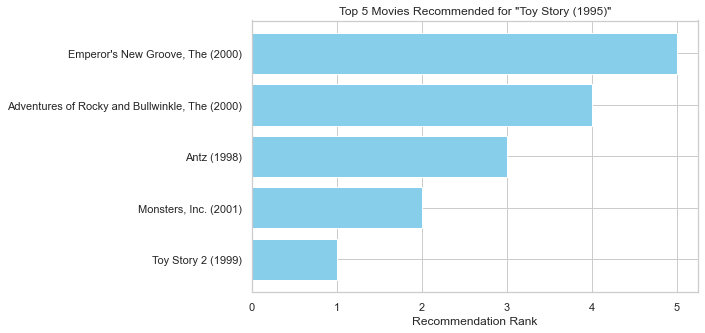

In [206]:
## Visualize the recommended movies
plt.figure(figsize=(8, 5))
plt.barh(recommended_movies[::-1], range(1, 6)[::-1], color='skyblue')
plt.xlabel('Recommendation Rank')
plt.title('Top 5 Movies Recommended for "Toy Story (1995)"')
plt.gca().invert_yaxis()  # Invert y-axis to have the best recommendation at the top
plt.show()

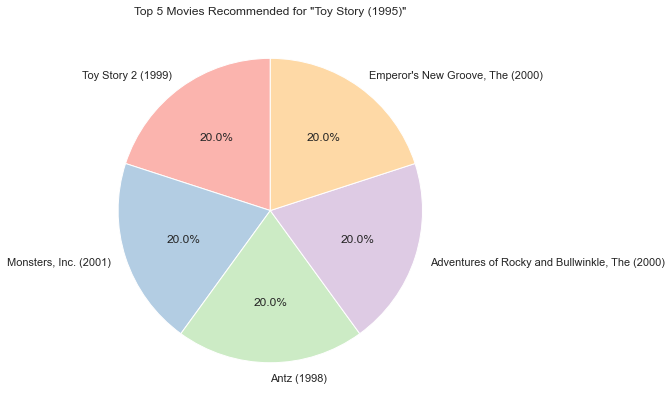

In [207]:
# Pie chart visualization
plt.figure(figsize=(7, 7))
plt.pie(
    [1 for _ in recommended_movies],  # Equal contribution for simplicity
    labels=recommended_movies,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)

# Title and display
plt.title('Top 5 Movies Recommended for "Toy Story (1995)"')
plt.show()

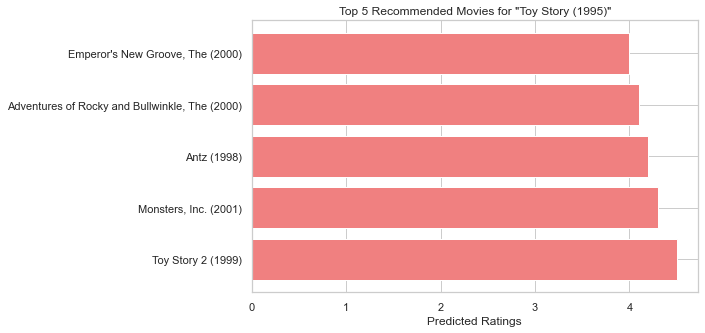

In [208]:
# Simulated recommendation ratings (replace with real predicted values if available)
ratings = [4.5, 4.3, 4.2, 4.1, 4.0]  

plt.figure(figsize=(8, 5))
plt.barh(recommended_movies[::-1], ratings[::-1], color='lightcoral')
plt.xlabel('Predicted Ratings')
plt.title('Top 5 Recommended Movies for "Toy Story (1995)"')
plt.gca().invert_yaxis()  # Best recommendation on top
plt.show()
